# Dependencies

## 1.1 Instal ffmpeg (ffprobe) and set CUDA_HOME to the system enviroments

In [1]:
# Install ffmpeg (ffprobe)
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
# set CUDA_HOME, here we use CUDA 10.1
import os
os.environ["CUDA_HOME"] = "/usr/local/cuda-10.1"

!echo $CUDA_HOME

/usr/local/cuda-10.1


## 1.1 Clone iPERCore Github Repo

In [3]:
!git clone https://github.com/iPERDance/iPERCore.git

Cloning into 'iPERCore'...
remote: Enumerating objects: 844, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (322/322), done.
remote: Total 844 (delta 196), reused 381 (delta 165), pack-reused 338
Receiving objects: 100% (844/844), 23.08 MiB | 30.77 MiB/s, done.
Resolving deltas: 100% (262/262), done.


## 1.2 Setup iPERCore

In [4]:
cd /content/iPERCore/

/content/iPERCore


In [5]:
os.makedirs("content/image")
os.makedirs("content/video")

In [6]:
!python setup.py develop

Cuda version is 10.1
/usr/bin/python3 -m pip install pip==20.2.4
     |████████████████████████████████| 1.5 MB 12.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.2.0 requires pip>=20.3, but you have pip 20.2.4 which is incompatible.
/usr/bin/python3 -m pip install torch==1.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.3 MB 23 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: After October 2020 you may experience errors when installing or upda

In [7]:
# Download all checkpoints
#!wget -O assets/checkpoints.zip "https://1drv.ws/u/s!AjjUqiJZsj8whLkwQyrk3W9_H7MzNA?e=rRje0G"
!wget -O assets/checkpoints.zip "https://download.impersonator.org/iper_plus_plus_latest_checkpoints.zip"
!unzip -o assets/checkpoints.zip -d assets/

!rm assets/checkpoints.zip

--2021-11-30 16:23:55--  https://download.impersonator.org/iper_plus_plus_latest_checkpoints.zip
Resolving download.impersonator.org (download.impersonator.org)... 101.32.75.151
Connecting to download.impersonator.org (download.impersonator.org)|101.32.75.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: ./iper_plus_plus_1.0.0_checkpoints.zip [following]
--2021-11-30 16:23:56--  https://download.impersonator.org/iper_plus_plus_1.0.0_checkpoints.zip
Reusing existing connection to download.impersonator.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://svimages.impersonator.org/checkpoints.zip [following]
--2021-11-30 16:23:56--  https://svimages.impersonator.org/checkpoints.zip
Resolving svimages.impersonator.org (svimages.impersonator.org)... 101.32.75.151
Connecting to svimages.impersonator.org (svimages.impersonator.org)|101.32.75.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://publi

In [8]:
# download samples
# !wget -O assets/samples.zip "https://1drv.ws/u/s!AjjUqiJZsj8whLobQPpoxo2hfhURrA?e=EUyIC2"
!wget -O assets/samples.zip  "https://download.impersonator.org/iper_plus_plus_latest_samples.zip"
!unzip -o assets/samples.zip -d  assets
!rm assets/samples.zip

--2021-11-30 16:25:07--  https://download.impersonator.org/iper_plus_plus_latest_samples.zip
Resolving download.impersonator.org (download.impersonator.org)... 101.32.75.151
Connecting to download.impersonator.org (download.impersonator.org)|101.32.75.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: ./iper_plus_plus_1.0.0_samples.zip [following]
--2021-11-30 16:25:08--  https://download.impersonator.org/iper_plus_plus_1.0.0_samples.zip
Reusing existing connection to download.impersonator.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://svimages.impersonator.org/samples.zip [following]
--2021-11-30 16:25:09--  https://svimages.impersonator.org/samples.zip
Resolving svimages.impersonator.org (svimages.impersonator.org)... 101.32.75.151
Connecting to svimages.impersonator.org (svimages.impersonator.org)|101.32.75.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.bn.files.1drv.com/

# Run Motion Imitation Demo

In [9]:
cd /content/iPERCore/

/content/iPERCore


In [10]:
import os
import os.path as osp
import platform
import argparse
import time
import sys
import subprocess
from IPython.display import HTML
from base64 import b64encode

## Run Scripts

In [11]:
# the gpu ids
gpu_ids = "0"

# the image size
image_size = 512

# the default number of source images, it will be updated if the actual number of sources <= num_source
num_source = 2

# the assets directory. This is very important, please download it from `one_drive_url` firstly.
assets_dir = "/content/iPERCore/assets"

# the output directory.
output_dir = "./results"

# the model id of this case. This is a random model name.
# model_id = "model_" + str(time.time())

# # This is a specific model name, and it will be used if you do not change it.
# model_id = "axing_1"

# symlink from the actual assets directory to this current directory
work_asserts_dir = os.path.join("./assets")
if not os.path.exists(work_asserts_dir):
    os.symlink(osp.abspath(assets_dir), osp.abspath(work_asserts_dir),
               target_is_directory=(platform.system() == "Windows"))

cfg_path = osp.join(work_asserts_dir, "configs", "deploy.toml")


### Run the `trump` case
In this case, there is only a frontal body image as the source inputs.

In [12]:
# This is a specific model name, and it will be used if you do not change it. This is the case of `trump`
model_id = "donald_trump_2"

# the source input information, here \" is escape character of double duote "
src_path = "\"path?=/content/iPERCore/assets/samples/sources/donald_trump_2/00000.PNG,name?=donald_trump_2\""


## the reference input information. There are three reference videos in this case.
# here \" is escape character of double duote "
# ref_path = "\"path?=/content/iPERCore/assets/samples/references/akun_1.mp4," \
#              "name?=akun_2," \
#              "pose_fc?=300\""

ref_path = "\"path?=/content/iPERCore/assets/samples/references/mabaoguo_short.mp4," \
             "name?=mabaoguo_short," \
             "pose_fc?=400\""

# ref_path = "\"path?=/content/iPERCore/assets/samples/references/akun_1.mp4,"  \
#              "name?=akun_2," \
#              "pose_fc?=300|" \
#              "path?=/content/iPERCore/assets/samples/references/mabaoguo_short.mp4," \
#              "name?=mabaoguo_short," \
#              "pose_fc?=400\""

print(ref_path)

!python -m iPERCore.services.run_imitator  \
  --gpu_ids     $gpu_ids       \
  --num_source  $num_source    \
  --image_size  $image_size    \
  --output_dir  $output_dir    \
  --model_id    $model_id      \
  --cfg_path    $cfg_path      \
  --src_path    $src_path      \
  --ref_path    $ref_path

"path?=/content/iPERCore/assets/samples/references/mabaoguo_short.mp4,name?=mabaoguo_short,pose_fc?=400"
ffprobe -show_entries stream=codec_type -of json /content/iPERCore/assets/samples/references/mabaoguo_short.mp4 -loglevel error
ffmpeg -y -i /content/iPERCore/assets/samples/references/mabaoguo_short.mp4 -ab 160k -ac 2 -ar 44100 -vn ./results/primitives/mabaoguo_short/processed/audio.mp3 -loglevel quiet
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate /content/iPERCore/assets/samples/references/mabaoguo_short.mp4
	Pre-processing: start...
----------------------MetaProcess----------------------
meta_input:
	path: /content/iPERCore/assets/samples/sources/donald_trump_2/00000.PNG
	bg_path: 
	name: donald_trump_2
primitives_dir: ./results/primitives/donald_trump_2
processed_dir: ./results/primitives/donald_trump_2/processed
vid_info_path: ./results/primitives/donald_trump_2/processed/vid_info.pkl
--------------------------------

In [13]:
import os
import os.path as osp
import platform
import argparse
import time
import sys
import subprocess
from IPython.display import HTML
from base64 import b64encode

In [14]:
def Generate():
  # the gpu ids
  gpu_ids = "0"

  # the image size
  image_size = 512

  # the default number of source images, it will be updated if the actual number of sources <= num_source
  num_source = 2

  # the assets directory. This is very important, please download it from `one_drive_url` firstly.
  assets_dir = "/content/"

  # the output directory.
  output_dir = "/content/results"

  # the model id of this case. This is a random model name.
  # model_id = "model_" + str(time.time())

  # # This is a specific model name, and it will be used if you do not change it.
  # model_id = "axing_1"

  # symlink from the actual assets directory to this current directory


  # This is a specific model name, and it will be used if you do not change it. This is the case of `trump`
  model_id = "test"

  # the source input information, here \" is escape character of double duote "
  src_path = "/content/iPERCore/content/image/test_1.png"


  ## the reference input information. There are three reference videos in this case.
  # here \" is escape character of double duote "
  # ref_path = "\"path?=/content/iPERCore/assets/samples/references/akun_1.mp4," \
  #              "name?=akun_2," \
  #              "pose_fc?=300\""

  ref_path = "/content/iPERCore/content/video/test_1.mp4"

  # ref_path = "\"path?=/content/iPERCore/assets/samples/references/akun_1.mp4,"  \
  #              "name?=akun_2," \
  #              "pose_fc?=300|" \
  #              "path?=/content/iPERCore/assets/samples/references/mabaoguo_short.mp4," \
  #              "name?=mabaoguo_short," \
  #              "pose_fc?=400\""

  print(ref_path)

  !python -m iPERCore.services.run_imitator  \
    --gpu_ids     $gpu_ids       \
    --num_source  $num_source    \
    --image_size  $image_size    \
    --output_dir  $output_dir    \
    --model_id    $model_id      \
    --cfg_path    $cfg_path      \
    --src_path    $src_path      \
    --ref_path    $ref_path


In [15]:
!pip install flask-ngrok

In [ ]:
import os
import os.path as osp
import platform
import argparse
import time
import sys
import subprocess
from IPython.display import HTML
from base64 import b64encode


from flask_ngrok import run_with_ngrok
from flask import Flask,render_template,request,redirect,url_for
import os
app = Flask(__name__)
run_with_ngrok(app)

result_path = ""
# @app.route("/")
# def home():
#     return "<h1>Running Flask on Google Colab!</h1>"
@app.route('/',methods=["GET","POST"])
def index():
    result_path ="/content/results/primitives/synthesis/imitations/-test_1.mp4.mp4"
    if request.method == "POST":
        if request.form['action'] == "uploadVideo":
            videoFile = request.files['Video']
            print(videoFile)
            Upload_Folder = '/content/iPERCore/content/video/'
            path = os.path.join(Upload_Folder, "test_1.mp4")
            videoFile.save(path)
            
            
            
        elif request.form['action'] == "uploadImage":
            imageFile = request.files['Image']
            print(imageFile)
            Upload_Folder = '/content/iPERCore/content/image/'
            path = os.path.join(Upload_Folder, "test_1.png")
            imageFile.save(path)
            

        elif request.form['action'] == "generate":
            # global result_path
            Generate()
            # result_path = "/content/iPERCore/content/video/test_1.mp4"#"/content/iPERCore/results/primitives/donald_trump_2/synthesis/imitations/donald_trump_2-mabaoguo_short.mp4"  #change the Path as per Requirement
            #mp4 = open(result_path, "rb").read()
            #data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
        return redirect(url_for("index"))
          # return "<h1>Generate</h1>"
        
    else:
      if(result_path !=""):
        result_path ="/content/results/primitives/synthesis/imitations/-test_1.mp4.mp4"# "/content/iPERCore/results/primitives/donald_trump_2/synthesis/imitations/donald_trump_2-mabaoguo_short.mp4" #change the Path as per Requirement
    
      if os.path.isfile(result_path):
        mp4 = open(result_path, "rb").read()
        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
      else:
        result_path =" "
        print("No File")
        # mp4 = open(result_path, "rb").read()
        data_url = " "
        print(data_url)
        return "<form method='post' action='/' enctype='multipart/form-data'> <input type='file' name='Image' id='Image' /> <button name='action' value='uploadImage' type='submit'>Upload Image</button><input type='file' name='Video' id='Video' /><button name='action' value='uploadVideo' type='submit'>Upload Video</button><button name='action' value='generate' type='submit'>Generate Results</button></form><video width='320' height='240' controls><source src='"+data_url+"' type='video/mp4'>No Video Uploaded yet.</video></div>"

      return "<form method='post' action='/' enctype='multipart/form-data'> <input type='file' name='Image' id='Image' /> <button name='action' value='uploadImage' type='submit'>Upload Image</button><input type='file' name='Video' id='Video' /><button name='action' value='uploadVideo' type='submit'>Upload Video</button><button name='action' value='generate' type='submit'>Generate Results</button></form><video width='320' height='240' controls><source src='"+data_url+"' type='video/mp4'>No Video Uploaded yet.</video></div>"

if __name__ == '__main__':
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://41b8-34-78-117-156.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [30/Nov/2021 16:52:32] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:52:33] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:52:34] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:52:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/Nov/2021 16:52:35] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:53:04] "POST / HTTP/1.1" 302 -


<FileStorage: 'WhatsApp Image 2021-11-30 at 7.54.54 AM.jpeg' ('image/jpeg')>


127.0.0.1 - - [30/Nov/2021 16:53:05] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:53:05] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:54:15] "POST / HTTP/1.1" 302 -


<FileStorage: 'Break dancer on a white background..mp4' ('video/mp4')>


127.0.0.1 - - [30/Nov/2021 16:54:15] "GET / HTTP/1.1" 200 -


No File
 


127.0.0.1 - - [30/Nov/2021 16:54:16] "GET / HTTP/1.1" 200 -


No File
 
/content/iPERCore/content/video/test_1.mp4
ffprobe -show_entries stream=codec_type -of json /content/iPERCore/content/video/test_1.mp4 -loglevel error
ffmpeg -y -i /content/iPERCore/content/video/test_1.mp4 -ab 160k -ac 2 -ar 44100 -vn /content/results/primitives/test_1.mp4/processed/audio.mp3 -loglevel quiet
ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=r_frame_rate /content/iPERCore/content/video/test_1.mp4
	Pre-processing: start...
----------------------MetaProcess----------------------
meta_input:
	path: /content/iPERCore/content/image/test_1.png
	bg_path: 
	name: 
primitives_dir: /content/results/primitives/
processed_dir: /content/results/primitives/processed
vid_info_path: /content/results/primitives/processed/vid_info.pkl
-------------------------------------------------------
----------------------MetaProcess----------------------
meta_input:
	path: /content/iPERCore/content/video/test_1.mp4
	bg_path: 
	name: test_1.mp

127.0.0.1 - - [30/Nov/2021 17:10:25] "POST / HTTP/1.1" 302 -


pred_: 100% 359/359 [03:13<00:00,  1.86it/s]
359it [00:05, 66.78it/s]
ffmpeg -y -i /content/results/primitives/synthesis/imitations/-test_1.mp4.mp4.avi -i /content/results/primitives/test_1.mp4/processed/audio.mp3 -vcodec h264 -shortest -strict -2 /content/results/primitives/synthesis/imitations/-test_1.mp4.mp4 -loglevel quiet
----------------------MetaOutput----------------------
 imitates test_1.mp4 in /content/results/primitives/synthesis/imitations/-test_1.mp4.mp4
------------------------------------------------------
Step 3: running imitator done.


127.0.0.1 - - [30/Nov/2021 17:12:47] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [30/Nov/2021 17:13:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2021 17:14:05] "GET /favicon.ico HTTP/1.1" 404 -


In [17]:
# this folder are created

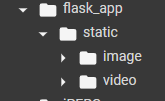